## General Procedure (for any algorithm)

### Getting training and testing data
* X_train, X_test, y_train, y_test = train_test_split(X, y)

### Applying an algorithm
* from sklearn.model_family import ModelAlgo
* mymodel = ModelAlgo(param1, param2)
* mymodel.fit(X_train, y_train)
* predictions = mymodel.predict(X_test)
* from sklearn.metrics import error_metric <- The metric can be applied to any regression task
* performance = error_metric(y_test, predictions)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
df = pd.read_csv('~/Documents/Data Science Masterclass/DATA/Advertising.csv')

In [6]:
# Getting all features
X = df.drop('sales', axis=1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [8]:
y = df['sales']

In [9]:
from sklearn.model_selection import train_test_split

# Random_state -> Used to shuffle data so that if the data was sorted, it doesn't cause a problem [KEEP IT FIXED ACROSS ALGOS]
# test_size -> what percentage of data should be used for testing? (30% is ideal for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression

# All operations happen in-place
mymodel = LinearRegression()
mymodel.fit(X_train, y_train)
predictions = mymodel.predict(X_test)
predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [30]:
# To view coefficients
mymodel.coef_ # In the same order as that of X

array([ 0.04469599,  0.1875657 , -0.00032275])

In [13]:
# Using Performance Metrics - Root Mean Squared Error

from sklearn.metrics import mean_absolute_error, mean_squared_error
np.sqrt(mean_squared_error(y_test, predictions))

1.516151937599388

## Creating Residual Plots (Best way to check if the algorithm applied was valid on the dataset)

In [19]:
test_residuals = y_test - predictions

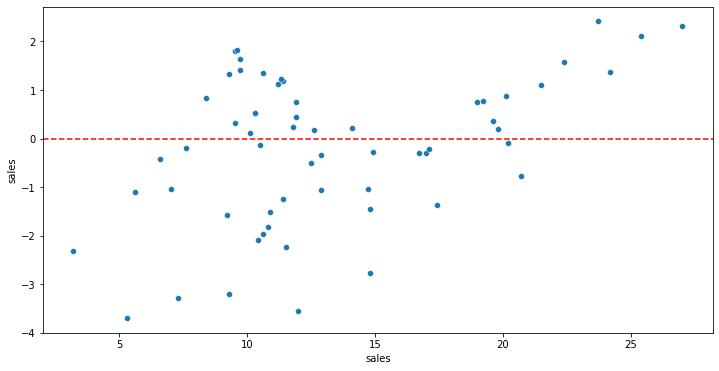

In [18]:
plt.figure(figsize=(12, 6))
sbn.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--')

# This plot should look random and centered around 0. If it has a pattern such
# as a curve or a line, then LR is not a good algorithm to apply on the dataset


## Using Probability Plot to Check for Inconsistencies
* The points should all lie on the line in an ideal scenario

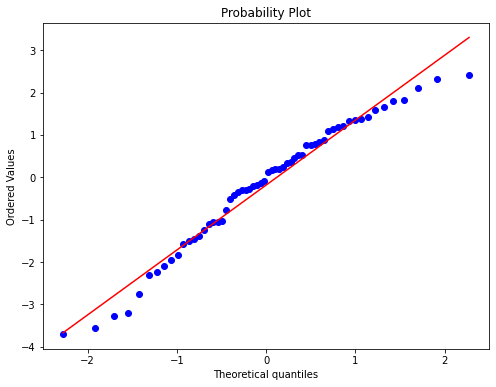

In [23]:
import scipy as sp
fig, ax = plt.subplots(figsize=(8, 6))
sp_plot = sp.stats.probplot(test_residuals, plot=ax)

## Making the final model
* Now we will use the entire X as the training data, as we were satisfied with the results we got before

In [24]:
final_model = LinearRegression()
final_model.fit(X, y) 

LinearRegression()

In [28]:
from joblib import dump, load

In [ ]:
dump(final_model, 'final_sales_model.joblib')

In [ ]:
loaded_model = load('final_sales_model.joblib')


In [ ]:
campaign = [[149, 22, 12]]
loaded_model.predict(campaign)